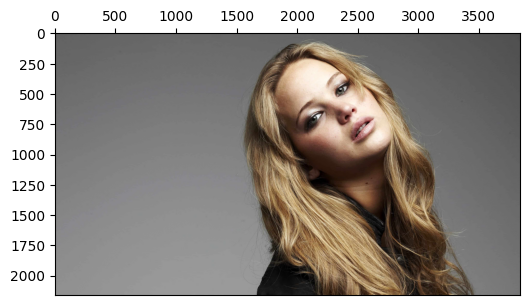

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('a1images\jeniffer.jpg')

fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

In [2]:
#Split the image into hue, saturation, and value planes.
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

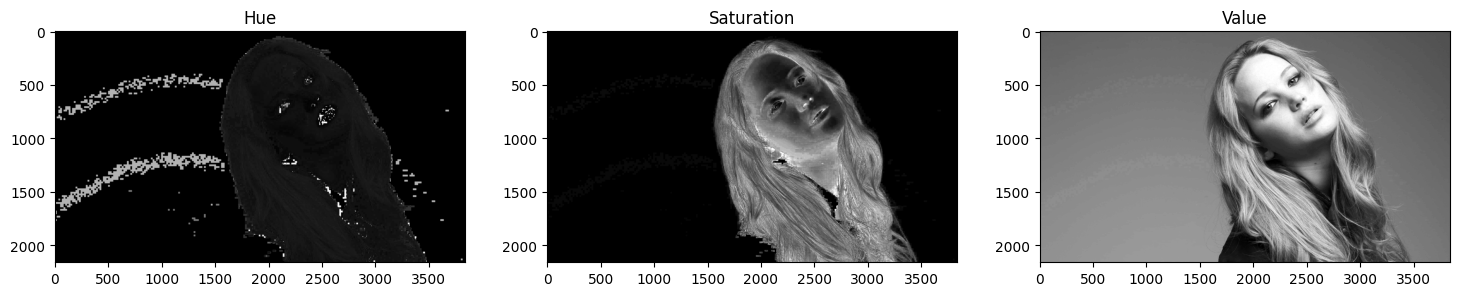

In [3]:
#diplay the 3 planes of the image
fig, ax = plt.subplots(1, 3, figsize=(18, 8))
ax[0].imshow(hsv_image[:, :, 0], cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(hsv_image[:, :, 1], cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(hsv_image[:, :, 2], cmap='gray')
ax[2].set_title('Value')
plt.show()


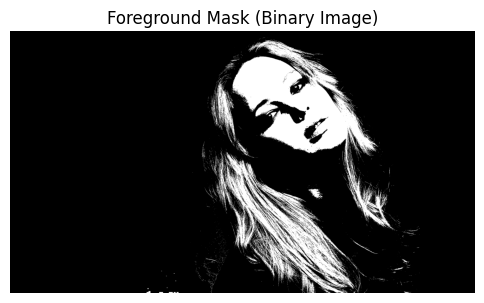

In [22]:
# Split the HSV image into its respective planes
h, s, v = cv.split(hsv_image)

# Threshold the value (V) plane to extract the foreground
_, foreground_mask = cv.threshold(v, 155, 210, cv.THRESH_BINARY)

# Display the foreground mask
plt.figure(figsize=(6, 6))
plt.title('Foreground Mask (Binary Image)')
plt.imshow(foreground_mask, cmap='gray')
plt.axis('off')
plt.show()

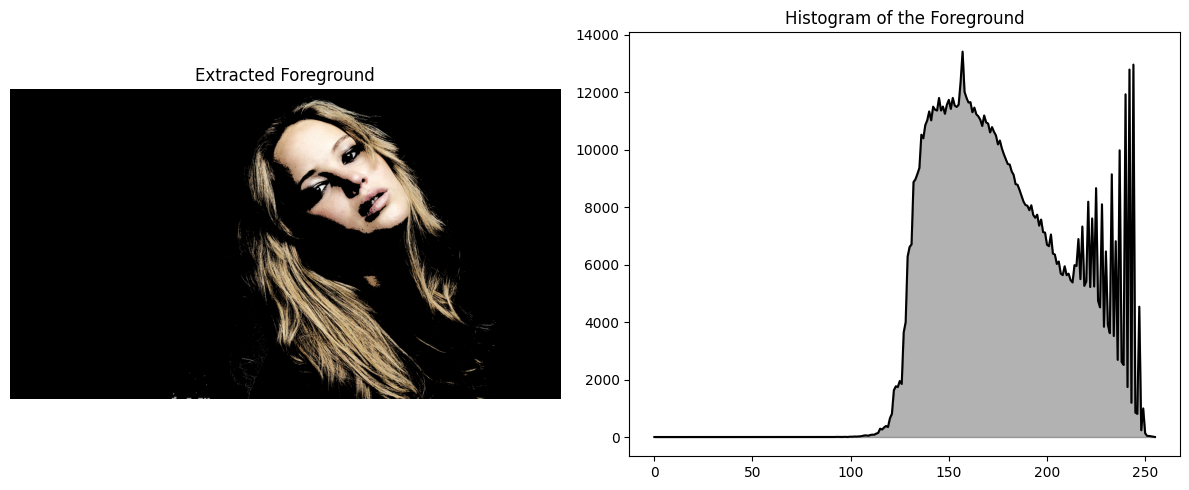

In [23]:
# Use the mask to extract the foreground from the original image
foreground = cv.bitwise_and(image, image, mask=foreground_mask)

# Compute the histogram for the extracted foreground
# Convert foreground to grayscale for histogram calculation
foreground_gray = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)

# Calculate the histogram of the foreground
foreground_hist = cv.calcHist([foreground_gray], [0], foreground_mask, [256], [0, 256])

# Plot the extracted foreground and its histogram
plt.figure(figsize=(12, 5))

# Display the foreground
plt.subplot(1, 2, 1)
plt.title('Extracted Foreground')
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.axis('off')

# Display the histogram of the foreground
plt.subplot(1, 2, 2)
plt.title('Histogram of the Foreground')
plt.plot(foreground_hist, color='black')
plt.fill_between(range(256), foreground_hist.flatten(), color='black', alpha=0.3)

plt.tight_layout()
plt.show()

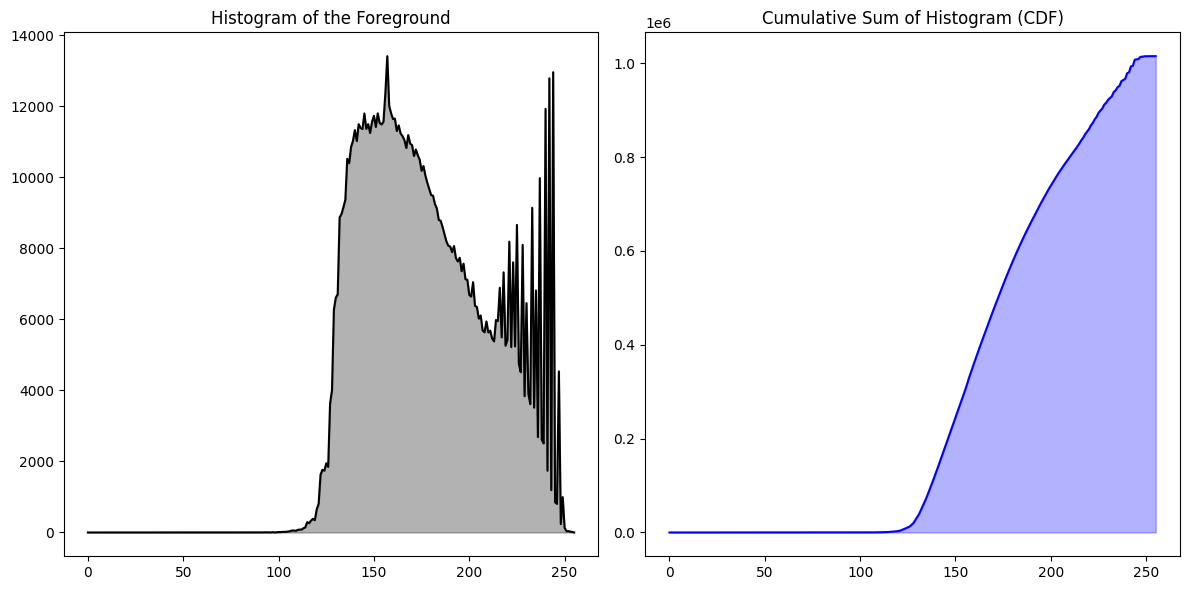

In [24]:
# Compute the cumulative sum of the histogram using np.cumsum
cdf = np.cumsum(foreground_hist)

# Normalize the CDF to fit within the 0-255 range (optional, if needed for visualization purposes)
cdf_normalized = cdf * (foreground_hist.max() / cdf.max())

# Plot the histogram and its cumulative sum (CDF)
plt.figure(figsize=(12, 6))

# Plot the histogram
plt.subplot(1, 2, 1)
plt.title('Histogram of the Foreground')
plt.plot(foreground_hist, color='black')
plt.fill_between(range(256), foreground_hist.flatten(), color='black', alpha=0.3)

# Plot the cumulative distribution function (CDF)
plt.subplot(1, 2, 2)
plt.title('Cumulative Sum of Histogram (CDF)')
plt.plot(cdf, color='blue')
plt.fill_between(range(256), cdf.flatten(), color='blue', alpha=0.3)

# Display the plots
plt.tight_layout()
plt.show()

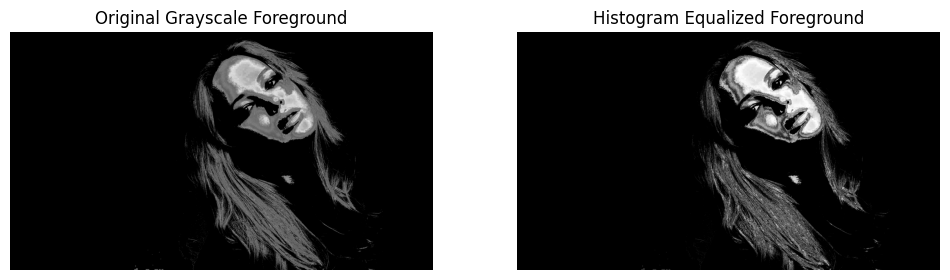

In [33]:
# Convert the extracted foreground to grayscale
foreground_gray = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)

# Get the dimensions and number of intensity levels
M, N = foreground_gray.shape
L = 256

# Calculate histogram and cumulative distribution function (CDF)
hist, bins = np.histogram(foreground_gray.ravel(), 256, [0, 256])
cdf = hist.cumsum()

# Normalize the CDF and create the transformation function
cdf_min = cdf[cdf > 0].min()
cdf_max = cdf.max()
cdf_normalized = (cdf - cdf_min) * (L - 1) / (cdf_max - cdf_min)  # Normalize CDF
t = cdf_normalized.astype(np.uint8)

# Apply the transformation to get the equalized image
equalized_foreground = t[foreground_gray]

# Plot the original grayscale foreground and the equalized result
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(foreground_gray, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Grayscale Foreground')
ax[0].axis('off')

ax[1].imshow(equalized_foreground, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalized Foreground')
ax[1].axis('off')

plt.show()

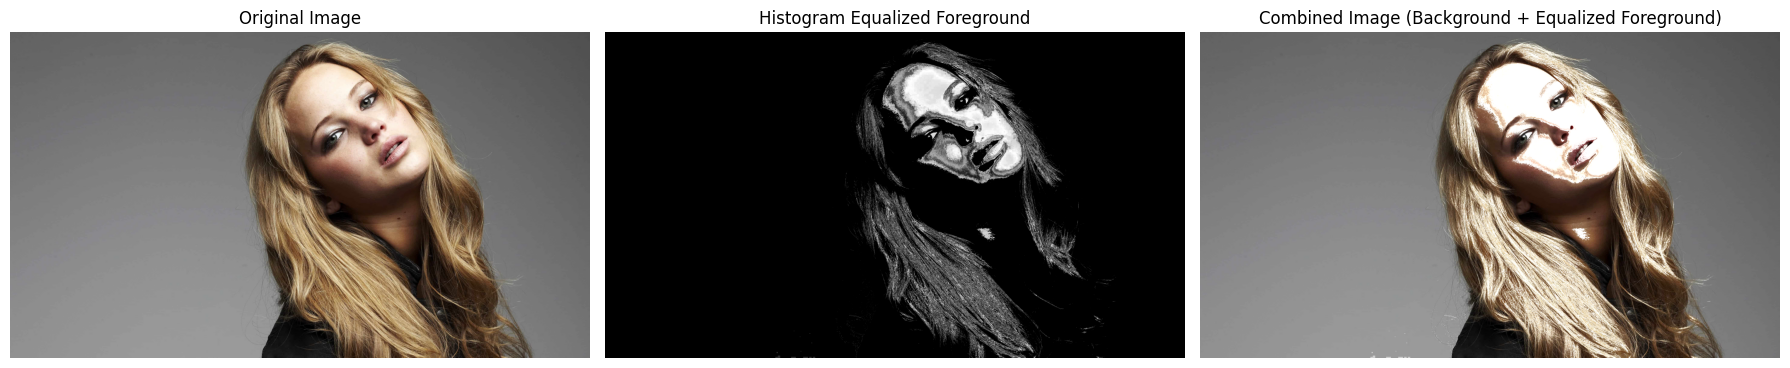

In [34]:
# Extract the background using the inverse of the foreground mask
background_mask = cv.bitwise_not(foreground_mask)
background = cv.bitwise_and(image, image, mask=background_mask)

# Convert the equalized foreground to a BGR image to add it to the background
equalized_foreground_bgr = cv.cvtColor(equalized_foreground, cv.COLOR_GRAY2BGR)

# Combine the background and the equalized foreground
combined_image = cv.add(background, equalized_foreground_bgr)

# Plot the images
fig, ax = plt.subplots(1, 3, figsize=(18, 8))

# Original Image
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

# Equalized Foreground
ax[1].imshow(equalized_foreground, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalized Foreground')
ax[1].axis('off')

# Combined Image
ax[2].imshow(cv.cvtColor(combined_image, cv.COLOR_BGR2RGB))
ax[2].set_title('Combined Image (Background + Equalized Foreground)')
ax[2].axis('off')

plt.tight_layout()
plt.show()